In [1]:
#EP Problem Set 2 Problem 3


In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as mpl

In [3]:
#set up chain as in slide 26
def u238_chain(t, y, DEBUG=False):
    half_life = np.array([ #put it all in seconds...?
        4.468*10**9*31557600, #byr to seconds
        24.10*24*3600, #days to seconds
        6.70*3600,     #hours to seconds
        245500*31557600, #years to seconds
        75380*31557600, #years to seconds
        1600*31557600, #years to seconds
        3.8235*24*3600, #days to seconds
        3.10*60, #minutes to seconds,
        26.8*60, #min to sec
        19.9*60, #min to sec
        164.3*10**(-6), #microseconds to seconds
        22.3*31557600, #years to seconds
        5.015*31557600, #years to seconds
        138.376*24*3600 #days to seconds
    ])
    num = len(half_life)
    if DEBUG:
        print('length of half_life is ', num)
    dydt=np.zeros(num+1)
    dydt[0]=-y[0]/half_life[0] #first index only has material leaving
    for ii in range(1, num):
        #previous material decays to it, it decays away
        dydt[ii] = y[ii-1]/half_life[ii-1] - y[ii]/half_life[ii]
        if DEBUG:
            print('doing ii ', ii)
    dydt[num] = y[num-1]/half_life[num-1]
    
    if DEBUG:
        print('dydt full is ', dydt)
        
    dydt *=np.log(2) #natural logarithm of 2
    return dydt
    

In [4]:
y = np.zeros(15)
y[0] = 1
x0=0
# x1=1*10**9 
x1=10*10**9*31557600 #1 billion years in seconds

#t=0
# u238_chain(t, y)
ans_radau = integrate.solve_ivp(u238_chain, [x0, x1], y, method='Radau')
#For this, better to use radau. It's a stiff equation and this will handle it better.

In [5]:
print('redau', ans_radau)
yfinal = ans_radau.y
tpoints = ans_radau.t

redau   message: 'The solver successfully reached the end of the integration interval.'
     nfev: 191
     njev: 1
      nlu: 54
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.11111000e+01, 1.11111100e+02,
       1.11111110e+03, 1.11111111e+04, 1.11111111e+05, 1.11111111e+06,
       1.11111111e+07, 1.11111111e+08, 1.11111111e+09, 1.11111111e+10,
       1.11111111e+11, 1.11111111e+12, 1.04931020e+13, 2.67707219e+13,
       5.51593581e+13, 1.02862902e+14, 2.18547565e+14, 7.40777476e+14,
       4.86444544e+15, 4.61011251e+16, 1.60574390e+17, 3.15576000e+17])
 t_events: None
        y: array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 9.99999999e-001, 9.99999995e

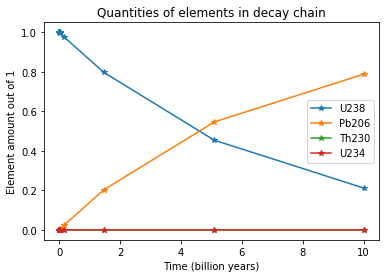

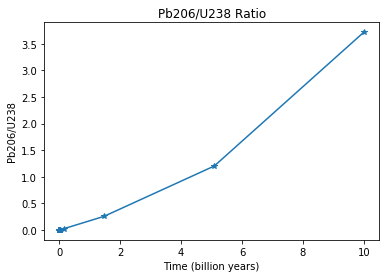

/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


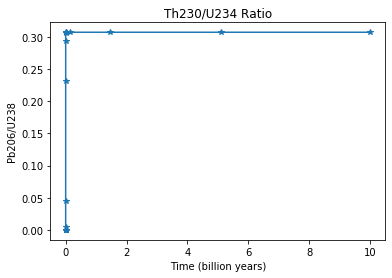

/home/elizabeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


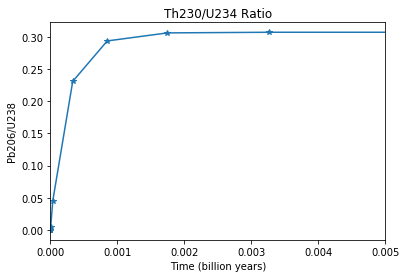

In [6]:
#PB206: index 14
#U238: index 0
#Thorium 230: index 4
#U234 : index 3


mpl.figure()
mpl.plot(tpoints/(10**9*31557600), yfinal[0, :], '*-')
mpl.plot(tpoints/(10**9*31557600), yfinal[14, :], '*-')
mpl.plot(tpoints/(10**9*31557600), yfinal[4, :], '*-')
mpl.plot(tpoints/(10**9*31557600), yfinal[3, :], '*-')
mpl.xlabel('Time (billion years)')
mpl.ylabel('Element amount out of 1')
mpl.legend(['U238', 'Pb206', 'Th230', 'U234'])
mpl.title('Quantities of elements in decay chain')
mpl.show()

mpl.figure()
mpl.plot(tpoints/(10**9*31557600), yfinal[14, :]/yfinal[0, :], '*-')
mpl.ylabel('Pb206/U238')
mpl.xlabel('Time (billion years)')
mpl.title('Pb206/U238 Ratio')
mpl.show()

mpl.figure()
mpl.plot(tpoints/(10**9*31557600), yfinal[4, :]/yfinal[3, :], '*-')
mpl.ylabel('Pb206/U238')
mpl.xlabel('Time (billion years)')
mpl.title('Th230/U234 Ratio')
mpl.show()

mpl.figure()
mpl.plot(tpoints/(10**9*31557600), yfinal[4, :]/yfinal[3, :], '*-')
mpl.ylabel('Pb206/U238')
mpl.xlabel('Time (billion years)')
mpl.title('Th230/U234 Ratio')
mpl.xlim([0, 5*10**(-3)])
mpl.show()



The ratio of Pb206 to U238 definitely makes sense. It reaches 1 at about the half life of U238, when half of it will have decayed down the chain to Pb206, as the rest of the decay processes are very fast compared to U238 (as can be seen by the first graph where the intermediate U234 and Th230 remain very small).

The ratio of Th230/U234 also makes sense as Th230 decays about three times as fast as U234, so it reaches an equilibrium at about 1/3.